# Le pouvoir d'achat des ouvrier anglais

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv')
data.head()

Unnamed: 0  Year  Wheat  Wages
0           1  1565   41.0   5.00
1           2  1570   45.0   5.05
2           3  1575   42.0   5.08
3           4  1580   49.0   5.12
4           5  1585   41.5   5.15

La colonne _Unnamed:0_ ne contient pas d'information intéressante, on la supprime et on sauvegarde les données en local.

In [3]:
data = data[['Year', "Wheat", "Wages"]]
data.head()

Year  Wheat  Wages
0  1565   41.0   5.00
1  1570   45.0   5.05
2  1575   42.0   5.08
3  1580   49.0   5.12
4  1585   41.5   5.15

In [4]:
data.to_csv('Wheat.csv', index = False)


## Inspection rapide des données

In [5]:
data.describe()

Year      Wheat      Wages
count    53.000000  53.000000  50.000000
mean   1694.924528  43.264151  11.581600
std      77.089571  15.410287   7.336287
min    1565.000000  26.000000   5.000000
25%    1630.000000  33.000000   6.145000
50%    1695.000000  41.000000   7.800000
75%    1760.000000  47.000000  14.875000
max    1821.000000  99.000000  30.000000

In [6]:
data[data.isnull().any(axis=1)] 

Year  Wheat  Wages
50  1815   78.0    NaN
51  1820   54.0    NaN
52  1821   54.0    NaN

La colonne _Wages_ contient 3 valeurs manquantes pour les 3 dernières années observées. Par souci de simpicité on ne itent pas compte de ces données.

In [7]:
data_clean = data[data.Wages.isnull()==False]
print("Nombre d'observations initiales: {} / Nombre d'observations après avoir enlevé les valeurs manquates: {}".format(len(data),len(data_clean)))

Nombre d'observations initiales: 53 / Nombre d'observations après avoir enlevé les valeurs manquates: 50


## Visualisation

In [8]:
year = data_clean.sort_values('Year').Year
wages = data_clean.sort_values('Year').Wages
wheat = data_clean.sort_values('Year').Wheat

### 1 Playfair 

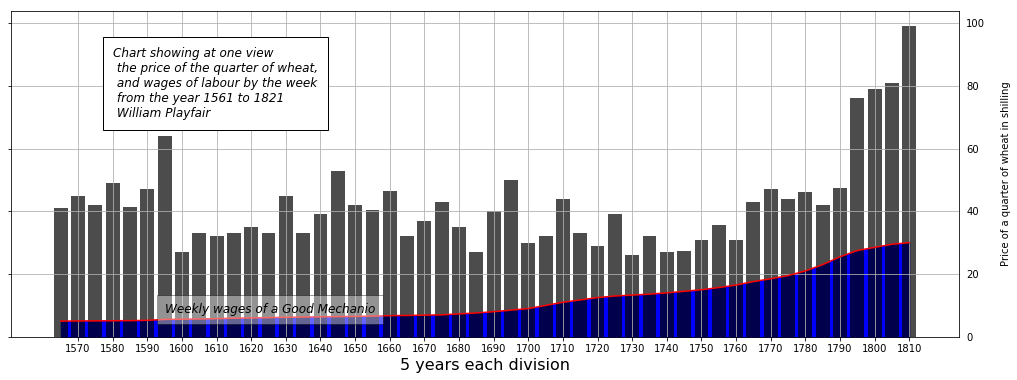

In [9]:
plt.figure(figsize=[17,6])
plt.bar(year, wheat, width = 4, color = 'black', alpha = 0.7)
plt.plot(year, wages, color ='red')
plt.fill_between(year, wages, color = 'blue')
plt.grid()
plt.xlabel('5 years each division', fontsize = 16)
plt.xticks(year[1::2])
plt.text(year[6], wages[6]+2, 'Weekly wages of a Good Mechanio',fontsize = 12,style='oblique',
        bbox={'facecolor': 'white', 'alpha' : 0.4, 'pad': 8} )
plt.text(1580, 70
         ,'Chart showing at one view\n the price of the quarter of wheat,\n and wages of labour by the week\n from the year 1561 to 1821\n William Playfair',
        fontsize = 12,style='italic',
        bbox={'facecolor': 'white', 'pad': 10})
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.ylabel("Price of a quarter of wheat in shilling", fontsize = 10, labelpad=-1000 )
plt.show()

### 2 Modification des ordonnées

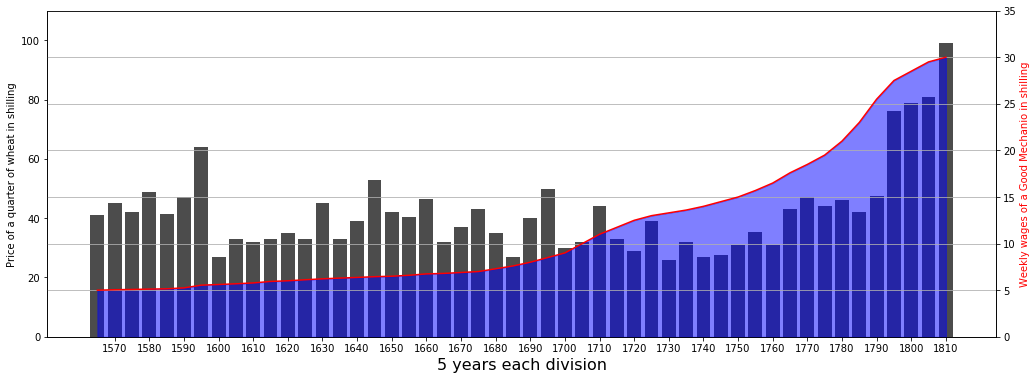

In [10]:
fig,ax1 =plt.subplots()
fig.set_size_inches(17,6)

ax1.bar(year, wheat, width = 4, color = 'black', alpha = 0.7)
ax1.set_ylim(0,110)

plt.ylabel("Price of a quarter of wheat in shilling")



ax2 = ax1.twinx()
ax2.plot(year, wages, color ='red')
ax2.fill_between(year, wages, color = 'blue', alpha = 0.5)
ax2.set_ylim(0,35)

ax1.set_xticks(year[1::2])
ax1.set_xlabel('5 years each division', fontsize = 16)
plt.grid()

plt.ylabel('Weekly wages of a Good Mechanio in shilling', color='r')
plt.show()

Une autre possibilité de représentation est de voir l'évolution de la proportion du prix du blé par rapport aux salaires en divisant le vecteur _wheat_ et le vecteur _wages_ par la somme de ceux-ci.

In [11]:
wheat_prop = wheat/(wheat+wages)
wages_prop = wages/(wheat+wages)

On peut facilement vérifier que _wheat\_prop_ + _wages\_prop_ nous donne un vecteur de 1

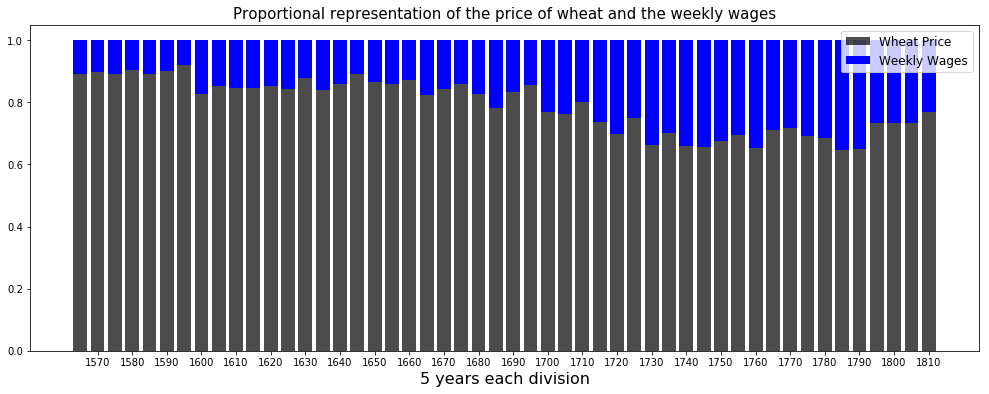

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(17,6)

width = 4
p1 = ax.bar(year, wheat_prop, width, color  ='black', label = "Wheat Price", alpha = 0.7
           )
p2 = ax.bar(year, wages_prop, width,color="blue",
            bottom=wheat_prop, label = "Weekly Wages")
ax.legend(fontsize = 12)
ax.set_xticks(year[1::2])
ax.set_xlabel('5 years each division', fontsize = 16)

ax.set_title('Proportional representation of the price of wheat and the weekly wages', fontsize = 15)
plt.show()

### 3 Représentation du pouvoir d'achat

In [13]:
wheat_quantity_per_wages = wages/wheat

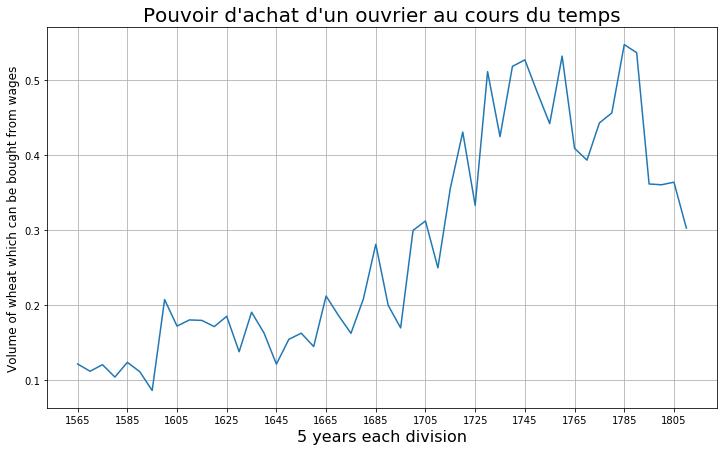

In [14]:
plt.figure(figsize=[12,7])
plt.plot(year , wheat_quantity_per_wages)
plt.grid()
plt.xticks(year[::4])
plt.xlabel('5 years each division', fontsize = 16)
plt.ylabel("Volume of wheat which can be bought from wages", fontsize = 12)
plt.title("Pouvoir d'achat d'un ouvrier au cours du temps" , fontsize = 20)
plt.show()

On peut remarquer que si le pouvoir d'achat augmente depuis le 16e siècle, il diminue fortement vers la fin du 18e

Text(0.5,1,'Weekly salary depending on wheat price')

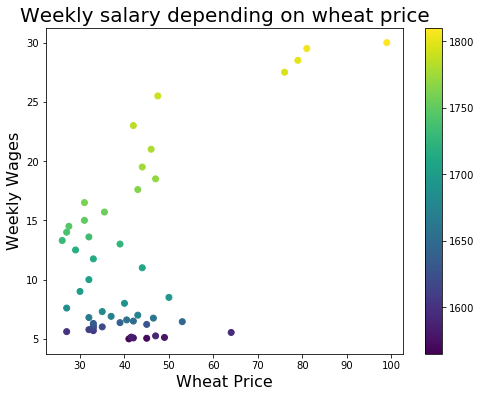

In [15]:
plt.figure(figsize=[8,6])
plt.scatter(wheat, wages, c=year)
plt.ylabel('Weekly Wages', fontsize = 16)
plt.xlabel("Wheat Price", fontsize = 16)
plt.colorbar()
plt.title('Weekly salary depending on wheat price', fontsize=20)

La représentation des données qui me paraît être la plus claire si on souhaite montrer que le pouvoir d'achat des ouvriers a augmenté est l'avant dernière représentation (le pouvoir d'achat). Elle est plus explicite et en représentant la quantité de blé que peut acheter un ouvrier au cours du temps, on voit très bien l'augmentation du pouvoir d'achat puis sa diminution, ce qui n'est pas si clair dans les autres représentations. Les autres représentations permettent de bien voir l'évolution du salaire mais moins celle du blé par rapport à celui ci.
